In [45]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
import os
from os.path import join
import cv2
import pandas as pd
import pathlib
from pathlib import Path
from tensorflow.keras.optimizers import RMSprop

In [5]:
directory = Path("flowers/flowers")

image_names = []
data_images = []
labels = []

# Iterating Over Directory To Extract Sub Directories
for dir in directory.iterdir():
    image_names.append(dir.name)
    print(dir.name)
# Iterating Over Sub Directories To Extract Lables
    for imgpath in dir.iterdir():
        if imgpath.name.endswith("jpg"):
            labels.append(dir.name)
            imgarr = cv2.imread(str(imgpath), cv2.IMREAD_GRAYSCALE)
            imgarr = cv2.resize(imgarr, (150,150))
            data_images.append(imgarr)

dandelion
tulip
rose
daisy
flowers
sunflower


In [6]:
# label_dummies = pd.get_dummies(labels)
# labels =  label_dummies.values.argmax(1)
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
labels = LabelEncoder().fit_transform(labels)
labels=to_categorical(labels)

In [7]:
image_names=np.asarray(image_names)
image_names.shape

(6,)

In [16]:
data = np.asarray(data_images).reshape(len(data_images),150*150)
data = data.astype("float32")/255.0
print (data.shape, data.dtype)

(4323, 22500) float32


In [17]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=.40,random_state=1)

In [18]:
X_train[0]

array([0.6862745 , 0.73333335, 0.6745098 , ..., 0.22745098, 0.22745098,
       0.24705882], dtype=float32)

In [19]:
y_train[0]

array([0., 0., 1., 0., 0.], dtype=float32)

In [20]:
X_train.shape

(2593, 22500)

In [21]:
X_test.shape

(1730, 22500)

In [22]:
y_train.shape

(2593, 5)

In [23]:
y_test.shape

(1730, 5)

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import losses,optimizers,regularizers
network =Sequential()
network.add(Dense(512,kernel_regularizer=regularizers.l2(0.001),activation="relu",input_shape=(X_train.shape[1],)))
network.add(Dense(256,kernel_regularizer=regularizers.l2(0.001),activation='relu'))
#network.add(Dropout(0.2))
network.add(Dense(128,kernel_regularizer=regularizers.l2(0.001),activation='relu'))
network.add(Dense(64,kernel_regularizer=regularizers.l2(0.001),activation='relu'))
#network.add(Dropout(0.2))
network.add(Dense(32,kernel_regularizer=regularizers.l2(0.001),activation='relu'))
network.add(Dense(8,kernel_regularizer=regularizers.l2(0.001),activation='relu'))
#network.add(Dropout(0.2))
network.add(Dense(5,activation="softmax"))

In [35]:
network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               11520512  
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_17 (Dense)             (None, 5)                

In [46]:
network.compile(loss ='categorical_crossentropy',optimizer=RMSprop(learning_rate= 0.0001),metrics=['accuracy'])

In [47]:
#batch_size = 30,
#steps_per_epoch = 30,
#epochs = 100,
#validation_split = 0.3,
#validation_steps = 10,
#validation_batch_size = 10
history=network.fit(
          X_train, y_train,
          batch_size = 30,
          steps_per_epoch=30,
          epochs=100,
          validation_split=0.3,
          validation_steps=10,
          validation_batch_size=10)
#history=network.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_steps = validation_steps, validation_batch_size = validation_batch_size)

Epoch 1/100
30/30 [==============================] - 7s 192ms/step - loss: 1.6065 - accuracy: 0.2135 - val_loss: 1.6148 - val_accuracy: 0.2200
Epoch 2/100
30/30 [==============================] - 6s 188ms/step - loss: 1.6012 - accuracy: 0.2490 - val_loss: 1.6148 - val_accuracy: 0.2200
Epoch 3/100
30/30 [==============================] - 6s 206ms/step - loss: 1.6024 - accuracy: 0.2270 - val_loss: 1.6148 - val_accuracy: 0.2200
Epoch 4/100
30/30 [==============================] - 7s 231ms/step - loss: 1.6006 - accuracy: 0.2363 - val_loss: 1.6148 - val_accuracy: 0.2200
Epoch 5/100
30/30 [==============================] - 7s 224ms/step - loss: 1.6124 - accuracy: 0.2019 - val_loss: 1.6148 - val_accuracy: 0.2200
Epoch 6/100
30/30 [==============================] - 6s 188ms/step - loss: 1.6042 - accuracy: 0.2257 - val_loss: 1.6148 - val_accuracy: 0.2200
Epoch 7/100
30/30 [==============================] - 6s 207ms/step - loss: 1.6018 - accuracy: 0.2508 - val_loss: 1.6148 - val_accuracy: 0.2200

Epoch 58/100
30/30 [==============================] - 7s 228ms/step - loss: 1.6076 - accuracy: 0.2192 - val_loss: 1.6148 - val_accuracy: 0.2200
Epoch 59/100
30/30 [==============================] - 6s 196ms/step - loss: 1.5976 - accuracy: 0.2251 - val_loss: 1.6148 - val_accuracy: 0.2200
Epoch 60/100
30/30 [==============================] - 6s 212ms/step - loss: 1.6016 - accuracy: 0.2198 - val_loss: 1.6149 - val_accuracy: 0.2200
Epoch 61/100
30/30 [==============================] - 6s 201ms/step - loss: 1.6051 - accuracy: 0.2069 - val_loss: 1.6148 - val_accuracy: 0.2200
Epoch 62/100
30/30 [==============================] - 8s 259ms/step - loss: 1.6045 - accuracy: 0.2375 - val_loss: 1.6149 - val_accuracy: 0.2200
Epoch 63/100
30/30 [==============================] - 7s 248ms/step - loss: 1.5945 - accuracy: 0.2707 - val_loss: 1.6149 - val_accuracy: 0.2200
Epoch 64/100
30/30 [==============================] - 6s 202ms/step - loss: 1.5971 - accuracy: 0.2049 - val_loss: 1.6148 - val_accuracy:

In [50]:
history_dict = history.history
history_dict.keys()
[u'accuracy', u'loss']

['accuracy', 'loss']

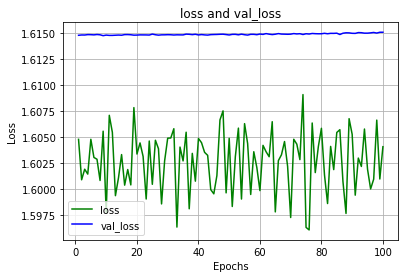

In [66]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(history_dict['loss']) + 1)
plt.plot(epochs, loss_values, 'g', label='loss')
plt.plot(epochs, val_loss, 'b', label='val_loss')
plt.title('loss and val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

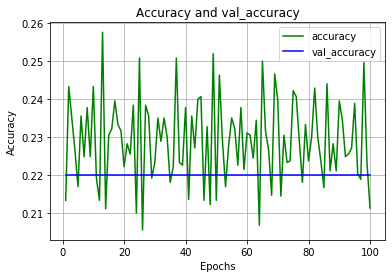

In [67]:
import matplotlib.pyplot as plt
history_dict = history.history
accuracy_values = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, accuracy_values, 'g', label='accuracy')
plt.plot(epochs, val_accuracy, 'b', label='val_accuracy')
plt.title('Accuracy and val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [61]:
network.evaluate(X_test,y_test)

55/55 [==============================] - 2s 41ms/step - loss: 1.5974 - accuracy: 0.2497


[1.5973591804504395, 0.24971097707748413]

In [62]:

pred = network.predict_classes(X_test[:10])
for i in range(len(pred)):
    print(pred[i],'==>',y_test[i])

1 ==> [0. 0. 0. 1. 0.]
1 ==> [0. 0. 0. 0. 1.]
1 ==> [0. 0. 1. 0. 0.]
1 ==> [0. 0. 0. 0. 1.]
1 ==> [0. 0. 1. 0. 0.]
1 ==> [0. 0. 1. 0. 0.]
1 ==> [0. 0. 1. 0. 0.]
1 ==> [0. 0. 0. 1. 0.]
1 ==> [0. 0. 0. 0. 1.]
1 ==> [0. 0. 0. 0. 1.]


/home/namrah/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


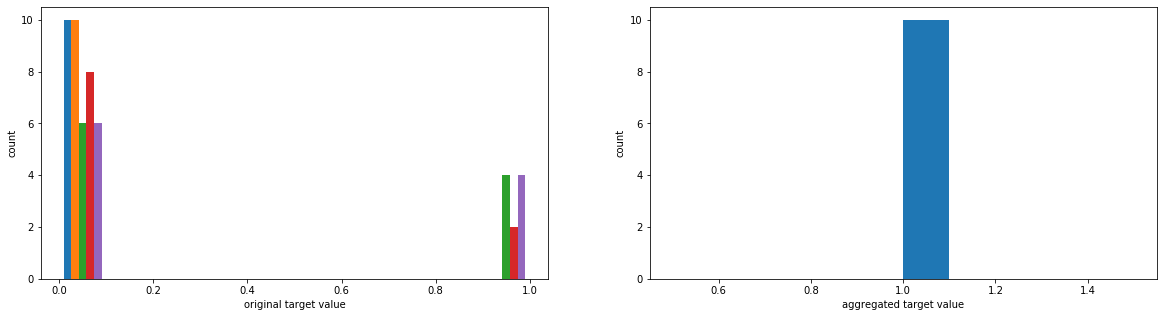

In [63]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1 )
plt.hist(y_test[:10])
plt.xlabel('original target value')
plt.ylabel('count')
plt.subplot(1, 2, 2)
plt.hist(pred)
plt.xlabel('aggregated target value')
plt.ylabel('count')
plt.show()